In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, roc_auc_score, roc_curve, recall_score
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import log_loss
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier #clasification tree


In [3]:
df = pd.read_csv('currency_data_train.csv')

C:\Users\kiran kumar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (30001) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.Target.value_counts()

Others    936
500       500
200       500
100       500
50        500
20        500
10        500
2000      488
2000       12
Name: Target, dtype: int64

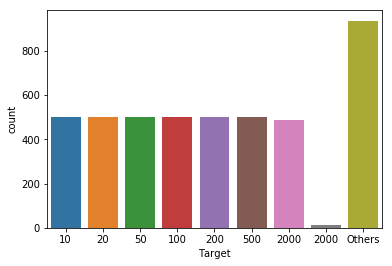

In [5]:
sns.countplot(df['Target'])
plt.show()

In [17]:
df[df['Target'] == 2000 ]

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,29991,29992,29993,29994,29995,29996,29997,29998,29999,Target
3000,2000_Rupees\2000_Rupees1.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000
3001,2000_Rupees\2000_Rupees10.jpg,0.0,0.0,0.0,0.0,0.0,137.0,46.0,25.0,255.0,...,0.0,0.0,46.0,137.0,0.0,0.0,0.0,0.0,0.0,2000
3002,2000_Rupees\2000_Rupees100.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000
3003,2000_Rupees\2000_Rupees1000.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000
3004,2000_Rupees\2000_Rupees1001.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3483,2000_Rupees\2000_Rupees1451.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000
3484,2000_Rupees\2000_Rupees1452.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000
3485,2000_Rupees\2000_Rupees1453.jpg,34.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,131.0,55.0,255.0,172.0,152.0,34.0,2000
3486,2000_Rupees\2000_Rupees1454.jpg,0.0,0.0,0.0,0.0,0.0,0.0,71.0,0.0,0.0,...,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,2000


In [6]:
X = df.drop('Target',axis = 1)
y = df['Target']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 40)

In [ ]:
model_rf = RandomForestClassifier().fit(X_train,y_train)


In [ ]:
y_pred = model_rf.predict(X)

In [20]:
classification_algos_name = [ 
                              "LogisticRegression", "DecisionTreeClassifier", 
                             "RandomForestClassifier", "AdaBoostClassifier",
                            "GradientBoostingClassifier"]

In [22]:
classification_algos=[LogisticRegression(), 
                      DecisionTreeClassifier(), RandomForestClassifier(),
                      AdaBoostClassifier(),GradientBoostingClassifier()]

In [ ]:
accuracy_score_list = []
for mod in classification_algos:
    model = mod
    model.fit(X_train, y_train)
    y_pred_all = model.predict(X_test)
    accuracy_score_list.append(accuracy_score(y_test,y_pred_all))
for idx,i in enumerate(accuracy_score_list):
    print(classification_algos_name[idx]," ",i)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.barplot(x = accuracy_score_list, y = classification_algos_name)
plt.show()